Employement and Store Types/Locations


In [1]:
# Dependencies
from config import gkey
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import gmaps



In [2]:
# Read CSV
CO_Medical = pd.read_csv("Data/Stores - Medical.csv")
CO_Retail = pd.read_csv("Data/Stores - Retail.csv")
Lat_Long = pd.read_csv("Data/us-zip-code-latitude-and-longitude.csv", sep=';')
State_Employment = pd.read_csv("Data/EmploymentByState.csv")

In [3]:
# Check Medical DataFrame
CO_Medical.head()

,LicenseNumber,FacilityName,DBA,FacilityType,City,ZipCode,DateUpdated
0,402-00001,ALLGREENS LLC,NaN,MMC,Denver,80204,2020-12-01
1,402-00002,ALTERNATIVE MEDICINE ON CAPITOL HILL LLC,NaN,MMC,Denver,80218,2020-12-01
2,402-00005,P2C3 LLC,THE SECRET STASH,MMC,Colorado Springs,80904,2020-12-01
3,402-00008,HERBAL OUTFITTERS LLC,THE GREEN JOINT,MMC,Rifle,81650,2020-12-01
4,402-00011,JGB VENTURES LLC,DANK,MMC,Denver,80207,2020-12-01


In [4]:
# Check Retail Data Frame
CO_Retail.head()

,LicenseNumber,FacilityName,DBA,FacilityType,City,ZipCode,DateUpdated
0,402R-00004,JGB VENTURES LLC,DANK,Retail Marijuana Store,Denver,80207,2020-12-01
1,402R-00005,CANOSA PROPERTY INVESTMENTS LLC,BOTANICO 2,Retail Marijuana Store,Denver,80204,2020-12-01
2,402R-00002,CENTRAL LLC,BONFIRE CANNABIS,Retail Marijuana Store,Central City,80427,2020-12-01
3,402R-00003,5110 SANCTUARY LLC,EVERBLOOM,Retail Marijuana Store,Denver,80216,2020-12-01
4,402R-00007,L3ASTOCKCOMPLEX LLC,EUFLORA,Retail Marijuana Store,Denver,80216,2020-12-01


In [5]:
CO_All_Types = pd.concat([CO_Retail, CO_Medical])
CO_All_Types

,LicenseNumber,FacilityName,DBA,FacilityType,City,ZipCode,DateUpdated
0,402R-00004,JGB VENTURES LLC,DANK,Retail Marijuana Store,Denver,80207,2020-12-01
1,402R-00005,CANOSA PROPERTY INVESTMENTS LLC,BOTANICO 2,Retail Marijuana Store,Denver,80204,2020-12-01
2,402R-00002,CENTRAL LLC,BONFIRE CANNABIS,Retail Marijuana Store,Central City,80427,2020-12-01
3,402R-00003,5110 SANCTUARY LLC,EVERBLOOM,Retail Marijuana Store,Denver,80216,2020-12-01
4,402R-00007,L3ASTOCKCOMPLEX LLC,EUFLORA,Retail Marijuana Store,Denver,80216,2020-12-01
...,...,...,...,...,...,...,...
426,402-01324,EXIT 243 LLC,DISPENSARY EXIT 243,MMC,Idaho Springs,80452,2020-12-01
427,402-01331,MAGGIES FARM LLC,MAGGIE'S FARM,MMC,Las Animas,81054,2020-12-01
428,402-01328,SISTEM COMMERCE CITY LLC,SILVER STEM FINE CANNABIS,MMC,Commerce City,80022,2020-12-01
429,402-01330,2251SB LLC,APOTHECARY FARMS,MMC,Colorado Springs,80909,2020-12-01


In [6]:
CO_Facility_Zip = CO_All_Types.groupby(['ZipCode','FacilityType']).size().reset_index(name='counts')
CO_Facility_Zip

,ZipCode,FacilityType,counts
0,80002,Retail Marijuana Store,1
1,80010,Retail Marijuana Store,5
2,80011,Retail Marijuana Store,5
3,80012,Retail Marijuana Store,2
4,80013,Retail Marijuana Store,1
...,...,...,...
246,81635,Retail Marijuana Store,7
247,81639,Retail Marijuana Store,1
248,81650,MMC,2
249,81650,Retail Marijuana Store,2


In [7]:
# Check zip code data 
# Source - https://public.opendatasoft.com/explore/dataset/us-zip-code-latitude-and-longitude/export/?location=2,43.25174,-72.87322&basemap=jawg.streets
Lat_Long

,Zip,City,State,Latitude,Longitude,Timezone,Daylight savings time flag,geopoint
0,66025,Eudora,KS,38.917032,-95.064550,-6,1,"38.917032,-95.06455"
1,74565,Savanna,OK,34.831398,-95.839670,-6,1,"34.831398,-95.83967"
2,75631,Beckville,TX,32.237924,-94.464270,-6,1,"32.237924,-94.46427"
3,92067,Rancho Santa Fe,CA,33.016492,-117.202640,-8,1,"33.016492,-117.20264"
4,92119,San Diego,CA,32.802250,-117.024310,-8,1,"32.80225,-117.02431"
...,...,...,...,...,...,...,...,...
43186,25612,Chauncey,WV,37.766620,-81.987550,-5,1,"37.76662,-81.98755"
43187,59444,Galata,MT,48.635319,-111.240830,-7,1,"48.635319,-111.24083"
43188,60532,Lisle,IL,41.789079,-88.085360,-6,1,"41.789079,-88.08536"
43189,61638,Peoria,IL,40.796887,-89.611146,-6,1,"40.796887,-89.611146"


In [8]:
# Merge Store Data & With Zip Code
Master_Location_Data = CO_Facility_Zip.merge(Lat_Long, left_on ='ZipCode', right_on='Zip', how = 'left')
Master_Location_Data

,ZipCode,FacilityType,counts,Zip,City,State,Latitude,Longitude,Timezone,Daylight savings time flag,geopoint
0,80002,Retail Marijuana Store,1,80002.0,Arvada,CO,39.795006,-105.09810,-7.0,1.0,"39.795006,-105.0981"
1,80010,Retail Marijuana Store,5,80010.0,Aurora,CO,39.739387,-104.86210,-7.0,1.0,"39.739387,-104.8621"
2,80011,Retail Marijuana Store,5,80011.0,Aurora,CO,39.739737,-104.80905,-7.0,1.0,"39.739737,-104.80905"
3,80012,Retail Marijuana Store,2,80012.0,Aurora,CO,39.698387,-104.83956,-7.0,1.0,"39.698387,-104.83956"
4,80013,Retail Marijuana Store,1,80013.0,Aurora,CO,39.659105,-104.77910,-7.0,1.0,"39.659105,-104.7791"
...,...,...,...,...,...,...,...,...,...,...,...
246,81635,Retail Marijuana Store,7,81635.0,Parachute,CO,39.493283,-108.11571,-7.0,1.0,"39.493283,-108.11571"
247,81639,Retail Marijuana Store,1,81639.0,Hayden,CO,40.488060,-107.26093,-7.0,1.0,"40.48806,-107.26093"
248,81650,MMC,2,81650.0,Rifle,CO,39.603225,-107.89755,-7.0,1.0,"39.603225,-107.89755"
249,81650,Retail Marijuana Store,2,81650.0,Rifle,CO,39.603225,-107.89755,-7.0,1.0,"39.603225,-107.89755"


In [9]:
Master_Location_Data_Clean = Master_Location_Data.dropna()
Master_Location_Data_Clean

,ZipCode,FacilityType,counts,Zip,City,State,Latitude,Longitude,Timezone,Daylight savings time flag,geopoint
0,80002,Retail Marijuana Store,1,80002.0,Arvada,CO,39.795006,-105.09810,-7.0,1.0,"39.795006,-105.0981"
1,80010,Retail Marijuana Store,5,80010.0,Aurora,CO,39.739387,-104.86210,-7.0,1.0,"39.739387,-104.8621"
2,80011,Retail Marijuana Store,5,80011.0,Aurora,CO,39.739737,-104.80905,-7.0,1.0,"39.739737,-104.80905"
3,80012,Retail Marijuana Store,2,80012.0,Aurora,CO,39.698387,-104.83956,-7.0,1.0,"39.698387,-104.83956"
4,80013,Retail Marijuana Store,1,80013.0,Aurora,CO,39.659105,-104.77910,-7.0,1.0,"39.659105,-104.7791"
...,...,...,...,...,...,...,...,...,...,...,...
246,81635,Retail Marijuana Store,7,81635.0,Parachute,CO,39.493283,-108.11571,-7.0,1.0,"39.493283,-108.11571"
247,81639,Retail Marijuana Store,1,81639.0,Hayden,CO,40.488060,-107.26093,-7.0,1.0,"40.48806,-107.26093"
248,81650,MMC,2,81650.0,Rifle,CO,39.603225,-107.89755,-7.0,1.0,"39.603225,-107.89755"
249,81650,Retail Marijuana Store,2,81650.0,Rifle,CO,39.603225,-107.89755,-7.0,1.0,"39.603225,-107.89755"


In [10]:
# Configure gmaps with API key
gmaps.configure(api_key=gkey)

In [11]:
# Store Lat & Long into  locations 
locations = Master_Location_Data_Clean[["Latitude", "Longitude"]]

# Convert # of locations to float and store

Count_of_locations = Master_Location_Data_Clean["counts"].astype(float)


In [12]:
# Create a loation Heatmap layer
fig = gmaps.figure()

heat_layer = gmaps.heatmap_layer(locations, weights=Count_of_locations, 
                                 dissipating=False, max_intensity=100,
                                 point_radius = 1)

fig.add_layer(heat_layer)

fig

Figure(layout=FigureLayout(height='420px'))

In [13]:
CO_Facility_Weight = CO_All_Types.groupby(['FacilityType']).size().reset_index(name='counts')
CO_Facility_Weight

,FacilityType,counts
0,MMC,431
1,Retail Marijuana Store,603


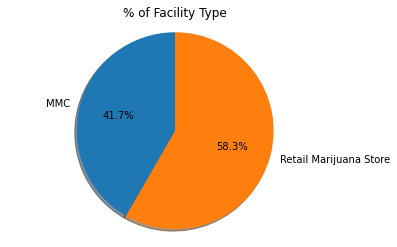

In [14]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = CO_Facility_Weight['FacilityType']
sizes = CO_Facility_Weight['counts']
explode = (0,0)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title("% of Facility Type")
plt.savefig('Images/FacilityPie.png', dpi=300)

plt.show()

In [15]:
State_Employment

,2017,2018,2019,2020
0,23407,26891,31486,34705


AttributeError: 'Line2D' object has no property 'xlabel'

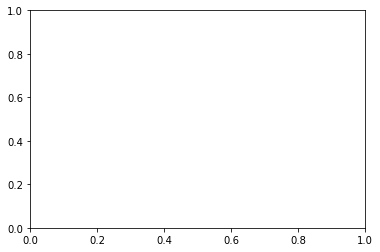

In [16]:
row = State_Employment.iloc[0]
row.plot(kind='line', xlabel='Year', ylabel='Number Employed in Cannabis Job')
plt.title('Coloardo Cannabis Jobs By Year  (Source: Leafly)')
plt.savefig('Images/Employment.png', dpi=300)
plt.show()